In [48]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import sklearn.tests as st
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [5]:
def sign_binomial_test(proportions, threshold = 0.5, verbose=True, allow_ties=False, alternative = 'two-sided', sig = 0.05):
  k = len(np.where(proportions > threshold)[0])
  
  if alternative == 'two-sided':
    sig /= 2
    
  if allow_ties:
    N = len(proportions)
  else:
    num_ties = len(np.where(proportions == threshold)[0])
    N = len(proportions) - num_ties
    
  if verbose:
    print('Running %s Binomial test on k = %s, n = %s' % (alternative, k, N))
    print('Percentage of examples where E>P: %s' % (k * 1.0 / N))

  pval = st.binom_test(k, N, 0.5, alternative)

  if verbose:
    if pval < sig:
      print('Should reject H0 given p-val = %s ' % (pval))
    else:
      print('Not enough evidence to reject H0 given p-val = %s \n' % (pval))
  
  return pval

In [3]:
df = pd.read_pickle('bow-df.dataframe')

In [4]:
df[(df['Density'] == 'dense') & (df['Colorspace'] == 'rgb')]

,K,Density,Colorspace,Classifier,Airplane mAP,Car mAP,Face mAP,Motorbike mAP,mAP
13,400,dense,rgb,liblinear,0.997374,0.985424,0.988054,0.982655,0.988377
14,400,dense,rgb,libsvm-poly,0.974509,0.850083,0.963278,0.908216,0.924022
15,400,dense,rgb,libsvm-rbf,0.974749,0.850264,0.963278,0.869654,0.914486
43,800,dense,rgb,liblinear,0.997365,0.986482,0.991199,0.981024,0.989017
44,800,dense,rgb,libsvm-poly,0.976828,0.958475,0.94198,0.855177,0.933115
45,800,dense,rgb,libsvm-rbf,0.977054,0.960385,0.94198,0.810418,0.922459
73,1600,dense,rgb,liblinear,0.996601,0.981896,0.992182,0.97529,0.986492
74,1600,dense,rgb,libsvm-poly,0.977179,0.943518,0.975002,0.779307,0.918751
75,1600,dense,rgb,libsvm-rbf,0.976983,0.943518,0.975002,0.755594,0.912774
103,2000,dense,rgb,liblinear,0.998038,0.982016,0.992894,0.976863,0.987453


In [106]:
colorspaces = df['Colorspace'].unique()
sampling = df['Density'].unique()

In [120]:
for color in colorspaces:
    for sample in sampling:
        i= np.argmax(df[(df['Density'] == sample) & (df['Colorspace'] == color)]['mAP'])
        print(color, sample, i, '\n', df.loc[i],'\n\n')

Gray dense 1 
 K                      400
Density              dense
Colorspace            Gray
Classifier       liblinear
Airplane mAP      0.986071
Car mAP           0.989757
Face mAP          0.996624
Motorbike mAP     0.972999
mAP               0.986363
Name: 1, dtype: object 


Gray key 136 
 K                     4000
Density                key
Colorspace            Gray
Classifier       liblinear
Airplane mAP      0.960402
Car mAP           0.975835
Face mAP          0.945912
Motorbike mAP     0.948854
mAP               0.957751
Name: 136, dtype: object 


RGB dense 34 
 K                      800
Density              dense
Colorspace             RGB
Classifier       liblinear
Airplane mAP      0.997365
Car mAP           0.986482
Face mAP          0.991199
Motorbike mAP     0.981024
mAP               0.989017
Name: 34, dtype: object 


RGB key 139 
 K                     4000
Density                key
Colorspace             RGB
Classifier       liblinear
Airplane mAP      0.988

In [34]:
map_HSV = df[df['Colorspace'] == 'HSV']['mAP']
map_Gray = df[df['Colorspace'] == 'Gray']['mAP']
map_rgb = df[df['Colorspace'] == 'rgb']['mAP']
map_RGB = df[df['Colorspace'] == 'RGB']['mAP']
map_Opp = df[df['Colorspace'] == 'Opp']['mAP']

In [35]:
print('HSV', np.mean(map_HSV), np.std(map_HSV))
print('Gray', np.mean(map_Gray), np.std(map_Gray))
print('rgb', np.mean(map_rgb), np.std(map_rgb))
print('RGB', np.mean(map_RGB), np.std(map_RGB))
print('Opp', np.mean(map_Opp), np.std(map_Opp))

HSV 0.939798886995 0.0294746940403
Gray 0.922796552144 0.0450719886179
rgb 0.940268527093 0.0305883453699
RGB 0.940268527093 0.0305883453699
Opp 0.930341711642 0.036447931185


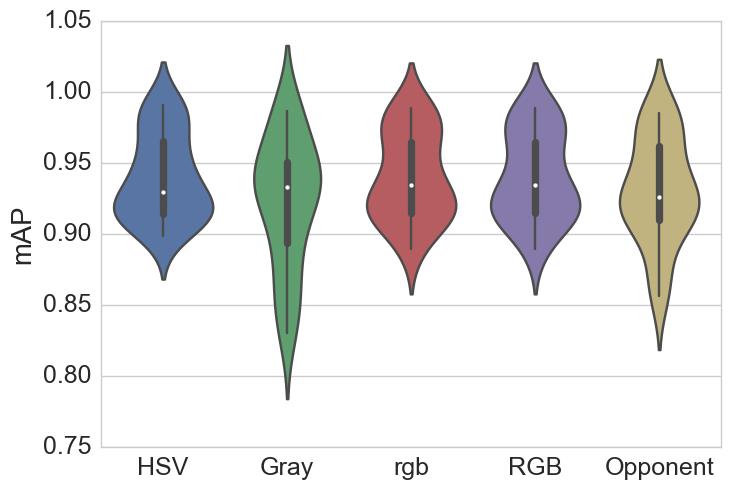

In [149]:
z = np.array([map_HSV, map_Gray, map_rgb, map_RGB, map_Opp])
cols = ['HSV', 'Gray', 'rgb', 'RGB', 'Opponent']
df_z = pd.DataFrame(z.T, columns=cols )
sns.set_style("whitegrid")
ax = sns.violinplot(data=df_z, order=cols)
plt.ylabel('mAP')
plt.show()

In [33]:
map_Gray

Series([], Name: mAP, dtype: object)

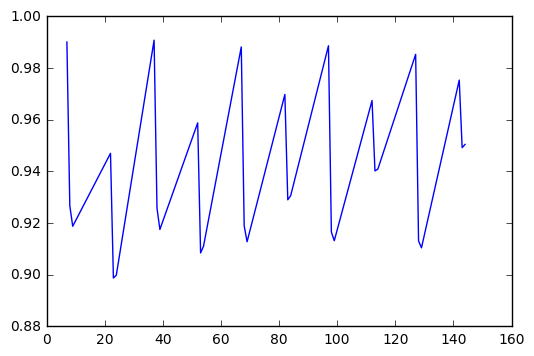

In [17]:
plt.plot(map1)
plt.plot(map2)
plt.show()

In [158]:
sign_binomial_test(map_HSV/map_Gray, threshold = 1, alternative='greater')

Running greater Binomial test on k = 20, n = 30
Percentage of examples where E>P: 0.6666666666666666
Should reject H0 given p-val = 0.0493685733527 


0.049368573352694539

In [155]:
sign_binomial_test(map_HSV/map_rgb, threshold = 1, alternative='greater')

Running greater Binomial test on k = 13, n = 30
Percentage of examples where E>P: 0.43333333333333335
Not enough evidence to reject H0 given p-val = 0.819202695973 



0.81920269597321749

In [157]:
sign_binomial_test(map_HSV/map_RGB, threshold = 1, alternative='greater')

Running greater Binomial test on k = 17, n = 30
Percentage of examples where E>P: 0.5666666666666667
Not enough evidence to reject H0 given p-val = 0.292332355864 



0.29233235586434642

In [86]:
sign_binomial_test(map_HSV/map_Opp, threshold = 1, alternative='greater')

Running greater Binomial test on k = 21, n = 30
Percentage of examples where E>P: 0.7
Should reject H0 given p-val = 0.0213869726285 


0.02138697262853384

In [129]:
sign_binomial_test(map_dense/map_key, threshold = 1, alternative='greater')

Running greater Binomial test on k = 55, n = 75
Percentage of examples where E>P: 0.7333333333333333
Should reject H0 given p-val = 3.24745009828e-05 


3.247450098275928e-05

In [132]:
print('Dense', np.mean(map_dense), np.std(map_dense), np.std(map_dense)/np.sqrt(len(map_dense)))
print('Key', np.mean(map_key), np.std(map_key), np.std(map_dense)/np.sqrt(len(map_key)))

Dense 0.943553752299 0.0314213572842 0.00362822581727
Key 0.925835929688 0.037352556269 0.00362822581727


In [146]:
sns.set(font_scale=1.8)

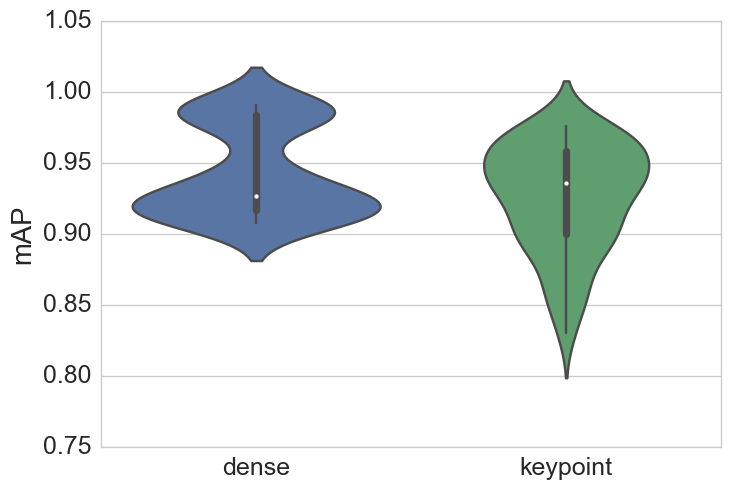

In [147]:
map_dense = np.array(df[df['Density'] == 'dense']['mAP'], dtype=np.float64)
map_key=  np.array(df[df['Density'] == 'key']['mAP'], dtype=np.float64)
b = np.array([map_dense, map_key])
df_b = pd.DataFrame(b.T, columns=['dense', 'keypoint'] )
sns.set_style("whitegrid")
ax = sns.violinplot(data=df_b)
plt.ylabel('mAP')
plt.show()
# plt.rcParams.update({'font.size': 24})


In [150]:
print('400', np.mean(map_k1), np.std(map_k1))
print('800', np.mean(map_k2), np.std(map_k2))
print('1600', np.mean(map_k3), np.std(map_k3))
print('2000', np.mean(map_k4), np.std(map_k4))
print('4000', np.mean(map_k5), np.std(map_k5))

400 0.921990072171 0.0429313768609
800 0.93214045634 0.0371882392783
1600 0.935761290739 0.032306647685
2000 0.939312922426 0.0303043558084
4000 0.944269463291 0.0296390669659


In [154]:
sign_binomial_test(map_k1/map_k4, threshold = 1, alternative='greater')
sign_binomial_test(map_k1/map_k3, threshold = 1, alternative='greater')
sign_binomial_test(map_k1/map_k2, threshold = 1, alternative='greater')
sign_binomial_test(map_k1/map_k5, threshold = 1, alternative='greater')

Running greater Binomial test on k = 15, n = 30
Percentage of examples where E>P: 0.5
Not enough evidence to reject H0 given p-val = 0.572232224047 

Running greater Binomial test on k = 15, n = 30
Percentage of examples where E>P: 0.5
Not enough evidence to reject H0 given p-val = 0.572232224047 

Running greater Binomial test on k = 7, n = 30
Percentage of examples where E>P: 0.23333333333333334
Not enough evidence to reject H0 given p-val = 0.999284546822 

Running greater Binomial test on k = 14, n = 30
Percentage of examples where E>P: 0.4666666666666667
Not enough evidence to reject H0 given p-val = 0.707667644136 



0.70766764413565353

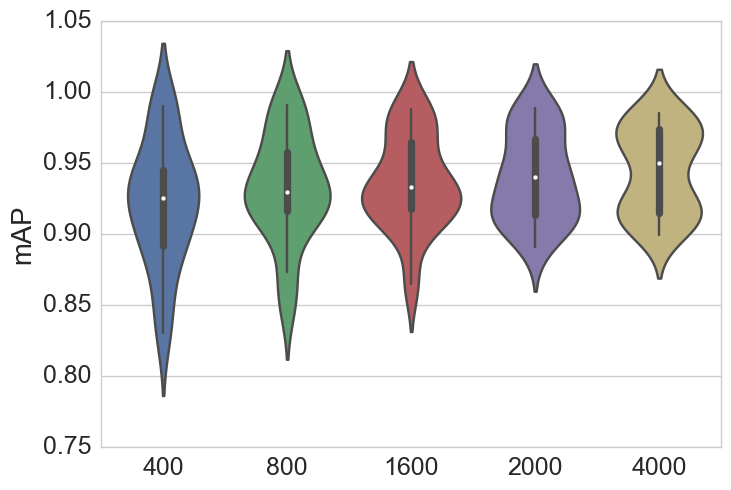

In [148]:
map_k1 = np.array(df[df['K'] == 400]['mAP'], dtype=np.float64)
map_k2 = np.array(df[df['K'] == 800]['mAP'], dtype=np.float64)
map_k3 = np.array(df[df['K'] == 1600]['mAP'], dtype=np.float64)
map_k4 = np.array(df[df['K'] == 2000]['mAP'], dtype=np.float64)
map_k5 = np.array(df[df['K'] == 4000]['mAP'], dtype=np.float64)

b = np.array([map_k1, map_k2, map_k3, map_k4, map_k5])
df_b = pd.DataFrame(b.T, columns=['400', '800', '1600', '2000', '4000'] )
sns.set_style("whitegrid")
ax = sns.violinplot(data=df_b)
plt.ylabel('mAP')
plt.show()